# CP1 Blatt5 Abgabe Lapp & Brieden

## erstellt von Tobias Lapp und Sven Brieden am 25.11.2017

## Aufgabe 5.1: Spectra of nucleons

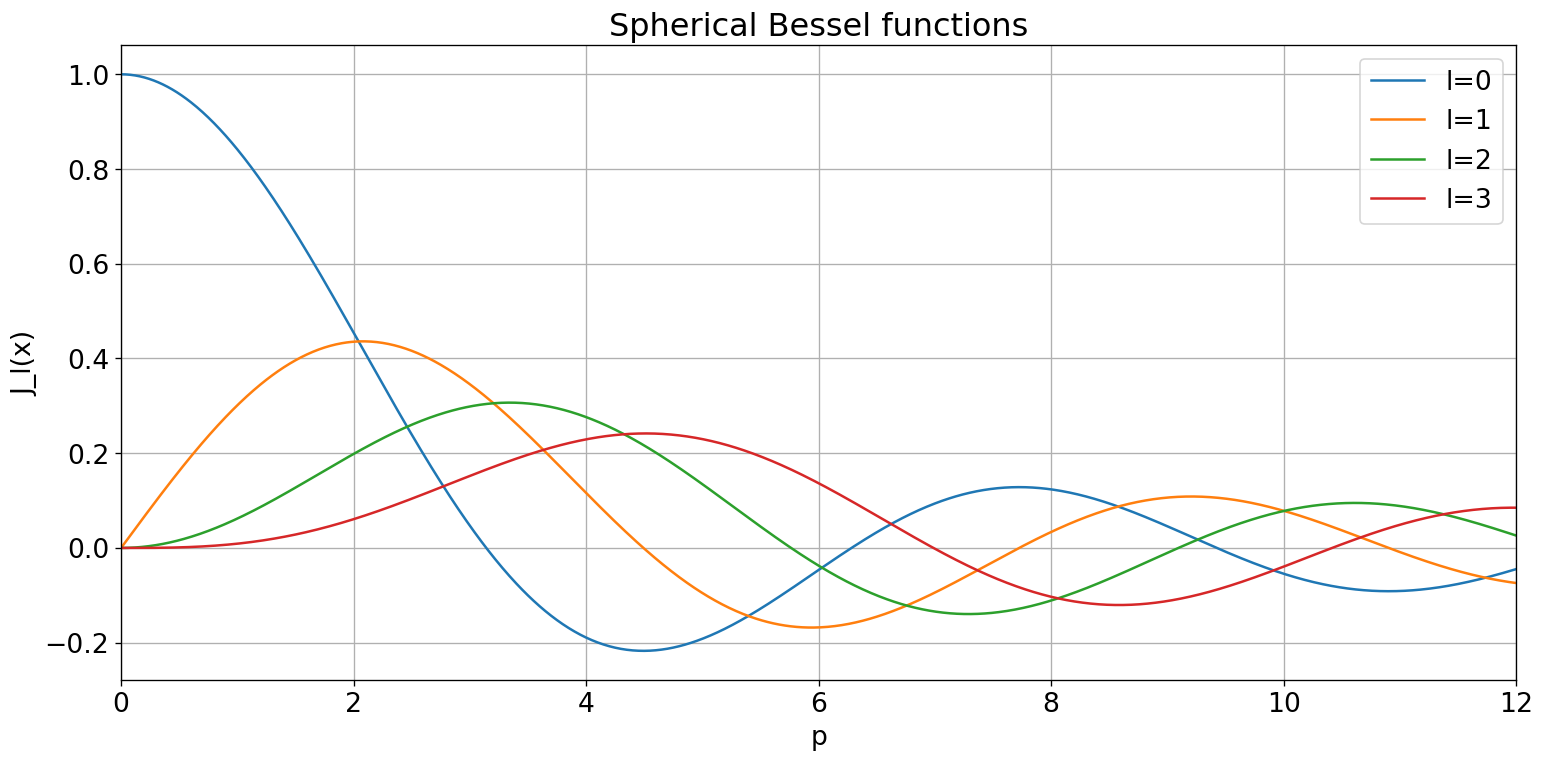

In [15]:
import numpy as np
import scipy.special as sps
import matplotlib.pyplot as plt

                      #(Ordnung der Besselfunktion, Anzahl Nullstellen)
#scipy.special.jn_zeros() # Bestimmt Nullstellen für besselfunktion der n-ten Ordnung
#scipy.special.spherical_jn()

p_end=12
p_step=0.01
dat_p=np.arange(0,p_end+p_step,p_step)

acc=0.00000001#Genauigkeit NS

l= 3
#ns=[]
#werte=[[],[]]
for l_ in range(l+1): # erzeuge l+1 Plots
    werte =np.array([sps.spherical_jn(l_,p) for p in dat_p])
    plt.plot(dat_p,werte,label='l=%i'%l_)

plt.ylabel('J_l(x)')
plt.xlabel('p')
plt.title('Spherical Bessel functions')
plt.xlim(0,p_end)
plt.legend(loc='upper right') 
plt.grid(True)

## Aufgabe 5.2: Van der Pauw’s method for the determination of resistivities

Seien:  
$R_a = \dfrac{U_{12}}{I_{13}}$ und $R_b = \dfrac{U_{24}}{I_{24}}$ und $e^{-\pi\frac{R_a}{R_s}} + e^{-\pi\frac{R_b}{R_s}}=1$

mit $R_s$ als gesuchet Größe

a)
Zu zeigen ist, dass mit den einheitelos Größen:
$x = π\dfrac{R_a}{R_s}$ und $\rho =\dfrac{R_b}{R_a}$<br />
die Gleichung folgende Form annimmt:
$e^{−x} + e^{−ρx} = 1$

$$
1 = e^{-\pi\frac{R_a}{R_s}} + e^{-\pi\frac{R_b}{R_s}}\\
= e^{-\pi\frac{R_a}{R_s}\cdot\frac{x}{π\frac{R_a}{R_s}}} + e^{-\pi\frac{R_b}{R_s}\cdot\frac{x}{π\frac{R_a}{R_s}}\cdot\frac{\rho}{\frac{R_b}{R_a}}}\\
= e^{-\not{\pi}\frac{\not{R_a}}{\not{R_s}}\cdot\frac{x}{\not{π}\frac{\not{R_a}}{\not{R_s}}}} + e^{-\not{\pi}\frac{\not{R_b}}{\not{R_s}}\cdot\frac{x}{\not{π}\frac{\not{R_a}}{\not{R_s}}}\cdot\frac{\rho}{\frac{\not{R_b}}{\not{R_a}}}}\\
= e^{−x} + e^{−ρx}
$$



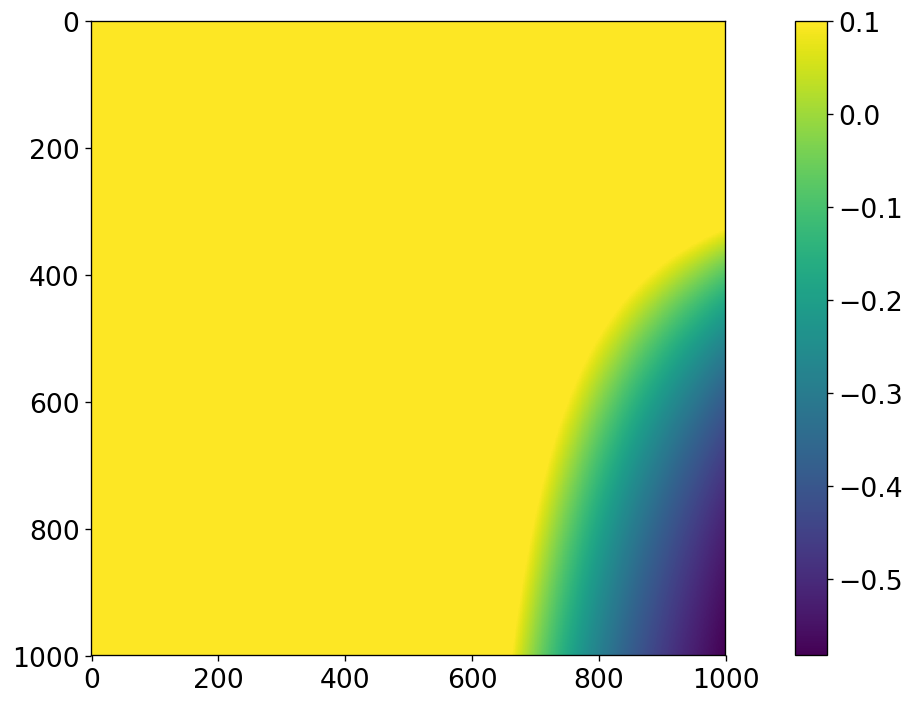

In [3]:
### numerische methode
f = lambda x,ρ: np.exp(-x) + np.exp(-ρ * x) - 1 # = 0
x, y = np.linspace(-1,1,1000), np.linspace(-1,3,1000)
X,Y = np.meshgrid(x,y)
plt.imshow(f(X,Y), vmax = 0.1)
plt.colorbar()

## Aufgabe 5.3: Particles on a line
$V(x_1, ..., x_N ) = \frac{1}{2} \sum_i x_i + \sum_{i \neq j} V(|x_i - x_j |)$ with $V(r)=\frac{1}{r}$

I used the analytical derivative $\dfrac{d V(x_1, ..., x_N)}{d x_j} = \sum_{i \neq j} \dfrac{|x_i-x_j|}{|x_i-x_j|^3}$ 

I tried to program a good gradient method, but with a fixed stepsize the result is really bad. The next try is the newton method, which is related by a gradient method. The result is perfect and it is possible to set the needed accuracy. But at this method we get the same problem if we set the stepsize/stepsize_factor too large, the order of our particles can change. I also tried to compute the derivatives numerically, but it doesn't work sufficiently good. But the derivative function gets more points in our Potential it should work also fine, but if will need more time the using the analytical derivative.

In [7]:
def V(x_Particles, nr_Particle):
    V = 0.5 * sum(x_Particles)
    for i in range(len(x_Particles)):
        if i!=nr_Particle:
            V -= 0.5/abs(x_Particles[i] - x_Particles[nr_Particle])
    return V

def dV_dx(x_Particles, nr_Particle):
    dV = 0
    for i in range(len(x_Particles)):
        if i!=nr_Particle:
            dV += (x_Particles[i] - x_Particles[nr_Particle])/abs(x_Particles[i] - x_Particles[nr_Particle])**3
    return dV

def plot(name):
    x_Particles_list_p = np.array(x_Particles_list)
    for p in range(N):
        plt.plot(x_Particles_list_p[:,p],range(len(x_Particles_list)), label= "particle nr. %i"%p)
    plt.title(name), plt.ylabel("Iteration"), plt.xlabel("position x"), plt.legend(), plt.show()

def Newton_Iteration():
    x = []
    for j in range(N):
        x.append(x_Particles_list[i][j] - stepsize_factor * V(x_Particles_list[i], j)/dV_dx(x_Particles_list[i], j))
    x_Particles_list.append(x)
    
def Gradient_Iteration():
    x = []
    for j in range(N):
        x.append(x_Particles_list[i][j] + stepsize * dV_dx(x_Particles_list[i],j))
    return x
   

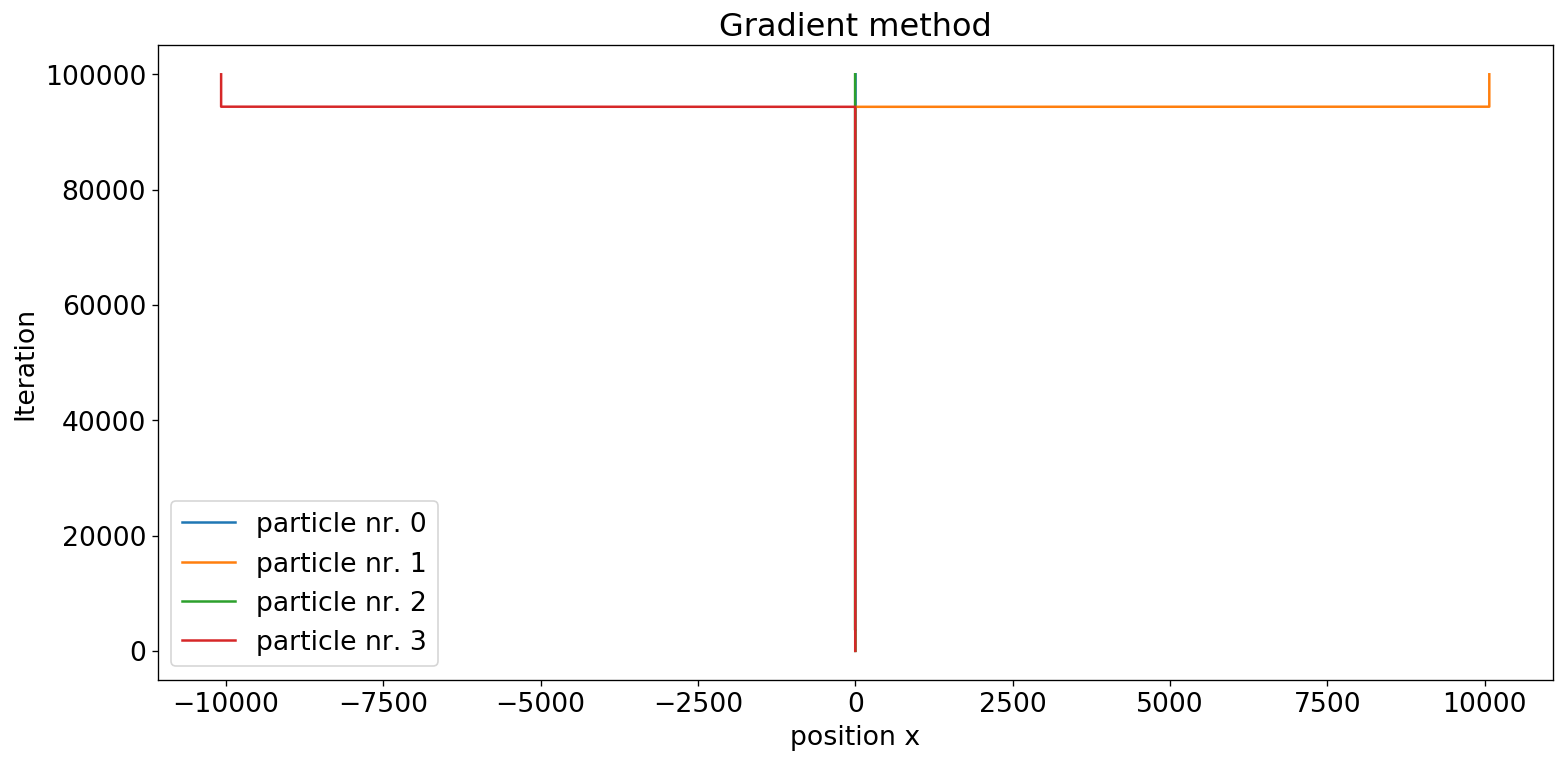

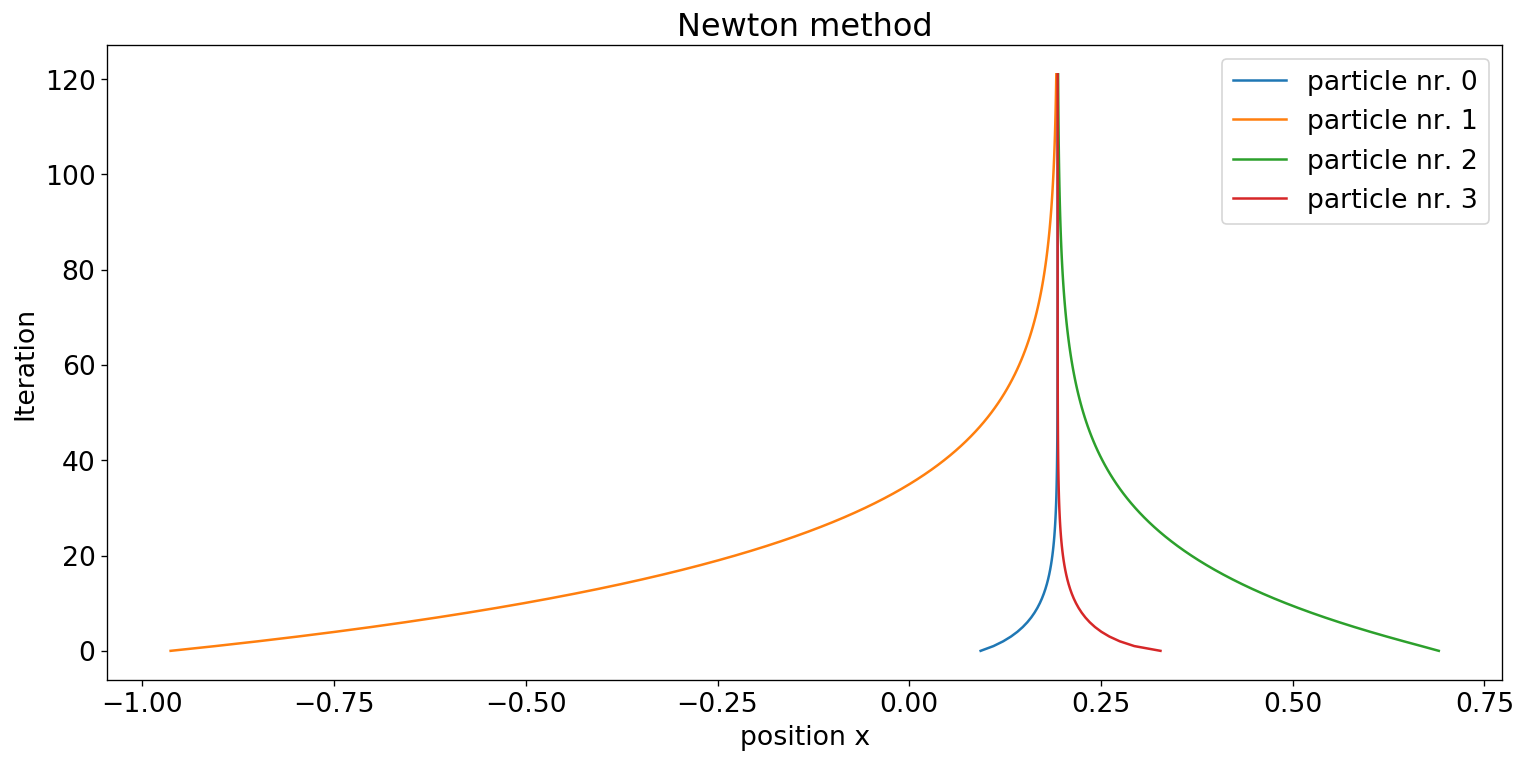

In [14]:
N = 4
accurancy = 0.0001
stepsize = 0.00001
stepsize_factor = 0.1

x_Particles_list = []
x_Particles_list.append(2 * np.random.rand(N) - 1)

for i in range(100000):
    x_new = Gradient_Iteration()
    x_Particles_list.append(x_new)        
plot("Gradient method")

x_Particles_list = [x_Particles_list[0]]
i = 0
while True:
    Newton_Iteration()
    i += 1
    if max(np.array(x_Particles_list[i]) - np.array(x_Particles_list[i-1])) <= accurancy:
        break      
plot("Newton method")

## Aufgabe 5.4: Symmetric many particle equilibria
To reduce to one-dimensional problem we use the relative coordinates:
$r = |x_1 - x_2$|

Optimization terminated successfully.
         Current function value: 1.500000
         Iterations: 21
         Function evaluations: 43
Optimization terminated successfully.
         Current function value: 3.120126
         Iterations: 21
         Function evaluations: 43


/usr/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in true_divide


((0, 30),
 Text(0.5,0,'radios from center of mass'),
 Text(0,0.5,'Potential V(r) for a Testparticle'))

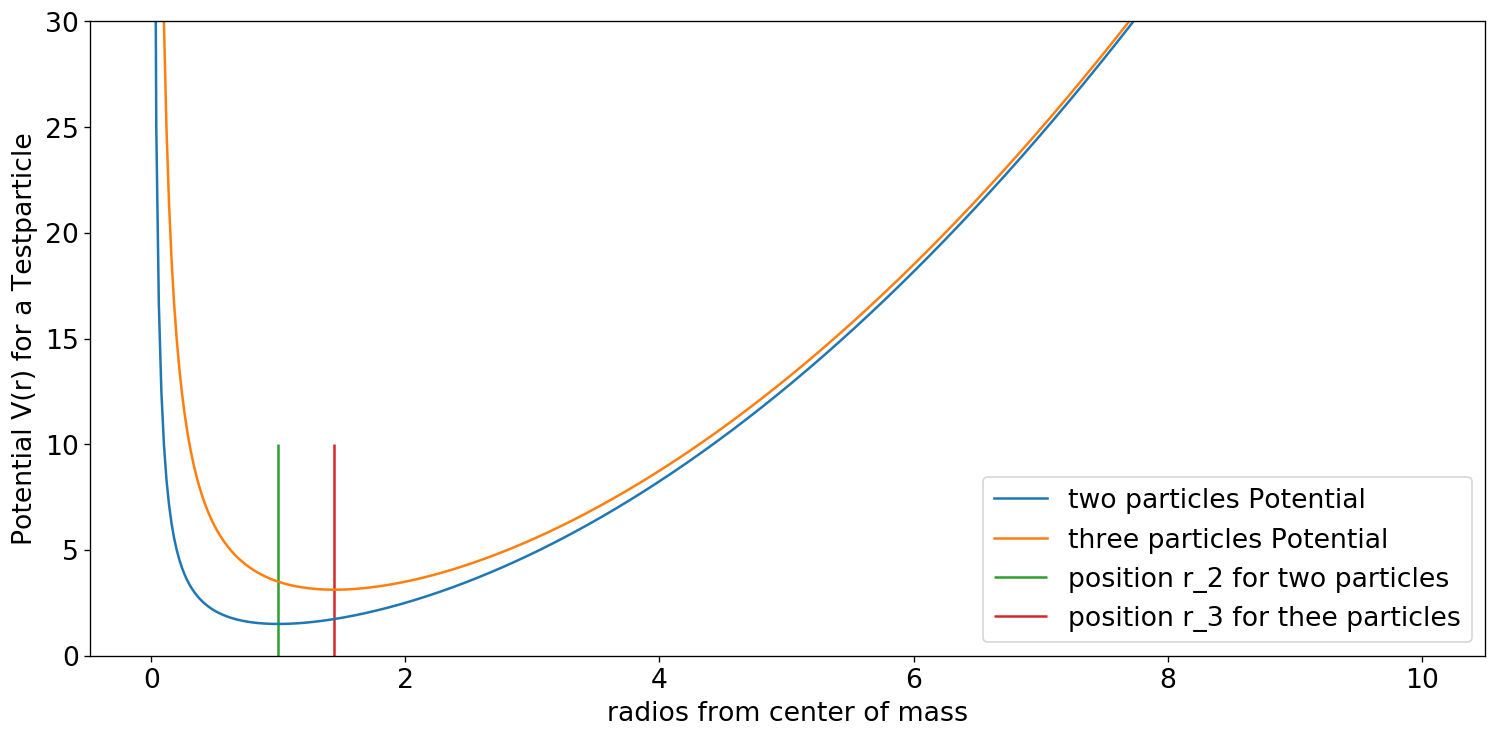

In [6]:
from scipy.optimize import fmin
# x_tp = x position of the testparticle

r = lambda x_1, x_2: abs(x_1 - x_2)
V_Harmonic = lambda x: x**2/2
V_Coulomb = lambda  d: 1/d
V_Potential_two_particles = lambda x_tp: V_Harmonic(x_tp) + V_Coulomb(r(x_tp,0))
V_Potential_tree_particles = lambda x_tp: V_Harmonic(x_tp) + V_Coulomb(r(x_tp,0)) + V_Coulomb(r(x_tp/2,0))

x_a = fmin(V_Potential_two_particles, 10)
x_b = fmin(V_Potential_tree_particles, 10)
x = np.linspace(0,10,500)
plt.plot(x, V_Potential_two_particles(x), label="two particles Potential")
plt.plot(x, V_Potential_tree_particles(x), label="three particles Potential")
plt.vlines(abs(x_a), 0,10,color="C2", label= "position r_2 for two particles")
plt.vlines(abs(x_b), 0,10,color="C3", label= "position r_3 for thee particles")
plt.ylim(0,30), plt.legend(), plt.xlabel("radios from center of mass"), plt.ylabel("Potential V(r) for a Testparticle")